In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("aerofit_treadmill.csv")
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
prices = {"KP281":1500,"KP481":1750,"KP781":2500}
data["price"] = data["Product"].map(prices)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


In [4]:
correlations = data[["Age","Fitness", "Miles", "price", "Usage","Education","Income"]].corr().round(3)
correlations

,Age,Fitness,Miles,price,Usage,Education,Income
Age,1.000,0.061,0.037,0.029,0.015,0.280,0.513
Fitness,0.061,1.000,0.786,0.697,0.669,0.411,0.535
Miles,0.037,0.786,1.000,0.644,0.759,0.307,0.543
price,0.029,0.697,0.644,1.000,0.623,0.563,0.696
Usage,0.015,0.669,0.759,0.623,1.000,0.395,0.520
Education,0.280,0.411,0.307,0.563,0.395,1.000,0.626
Income,0.513,0.535,0.543,0.696,0.520,0.626,1.000


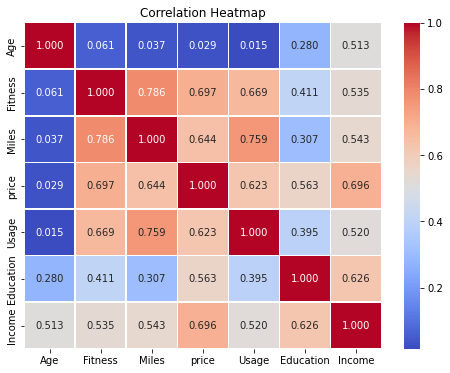

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
data.pivot_table(
    index="Product",
    values=["Usage","Miles","Fitness"],
    aggfunc={"Miles":["median","mean"],"Fitness":["mean"],"Usage":["mean"]}
).round(3)

Fitness    Miles         Usage
           mean     mean median   mean
Product                               
KP281     2.962   82.788   85.0  3.088
KP481     2.900   87.933   85.0  3.067
KP781     4.625  166.900  160.0  4.775

In [8]:
data.pivot_table(
    index=["Product","Gender"],
    values=["Usage","Miles","Fitness"],
    aggfunc={"Miles":["median","mean"],"Fitness":["mean"],"Usage":["mean"]}
).round(3)

Fitness    Miles         Usage
                  mean     mean median   mean
Product Gender                               
KP281   Female   2.875   76.200   75.0  2.900
        Male     3.050   89.375   85.0  3.275
KP481   Female   2.862   87.345   85.0  3.138
        Male     2.935   88.484   95.0  3.000
KP781   Female   4.571  180.000  200.0  5.000
        Male     4.636  164.121  160.0  4.727

  Product  Fitness
0   KP281   2.9625
1   KP481   2.9000
2   KP781   4.6250


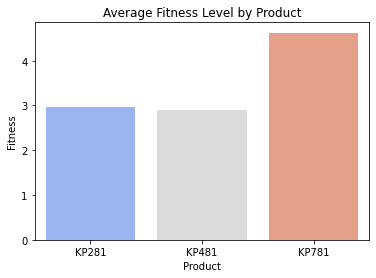

In [9]:
fitness_product = data.groupby('Product')['Fitness'].mean().reset_index()
print(fitness_product)
sns.barplot(x='Product', y='Fitness', data=fitness_product, palette='coolwarm')
plt.title('Average Fitness Level by Product')
plt.show()

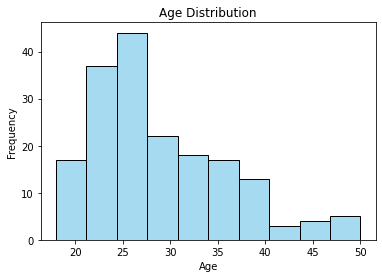

In [13]:
sns.histplot(data['Age'], bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

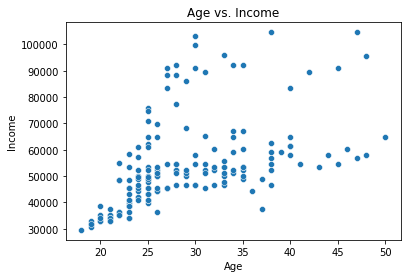

Correlation between Age and Income:
              Age    Income
Age     1.000000  0.513414
Income  0.513414  1.000000


In [11]:
sns.scatterplot(x='Age', y='Income', data=data)
plt.title('Age vs. Income')
plt.show()
correlation = data[['Age', 'Income']].corr()
print("Correlation between Age and Income:\n", correlation)

# Contribution by RAM

In [23]:
# 1. Basic statistics of the dataset
summary_stats = data.describe()
print("Basic Statistics:\n", summary_stats)

Basic Statistics:
               Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


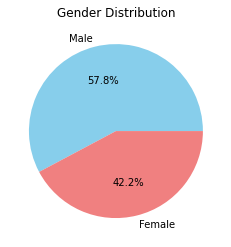

In [25]:
# 2. Gender distribution
plt.figure(figsize=(6,4))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

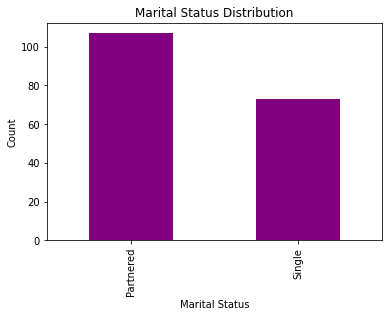

In [27]:
# 3. Marital Status distribution
plt.figure(figsize=(6,4))
data['MaritalStatus'].value_counts().plot(kind='bar', color='purple')
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

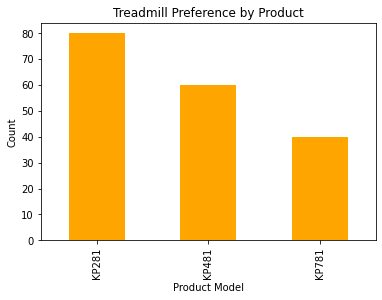

In [29]:
# 4. Most preferred treadmill model
plt.figure(figsize=(6,4))
data['Product'].value_counts().plot(kind='bar', color='orange')
plt.title("Treadmill Preference by Product")
plt.xlabel("Product Model")
plt.ylabel("Count")
plt.show()

In [30]:
# 5. Average treadmill usage per week by Product
treadmill_usage = data.groupby('Product')['Usage'].mean()
print("\nAverage Usage per Week by Product:\n", treadmill_usage)


Average Usage per Week by Product:
 Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64


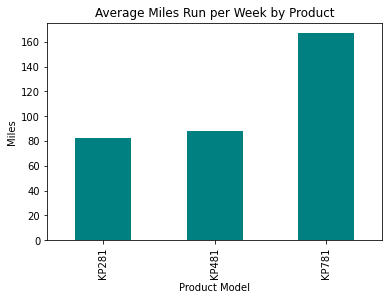

In [34]:
# 7. Average miles run per week by Product
miles_by_product = data.groupby('Product')['Miles'].mean()
miles_by_product.plot(kind='bar', color='teal')
plt.title("Average Miles Run per Week by Product")
plt.xlabel("Product Model")
plt.ylabel("Miles")
plt.show()

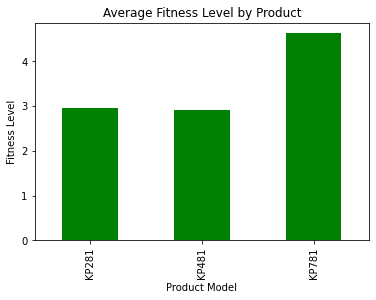

In [36]:
# 8. Fitness levels by Product
fitness_by_product = data.groupby('Product')['Fitness'].mean()
fitness_by_product.plot(kind='bar', color='green')
plt.title("Average Fitness Level by Product")
plt.xlabel("Product Model")
plt.ylabel("Fitness Level")
plt.show()

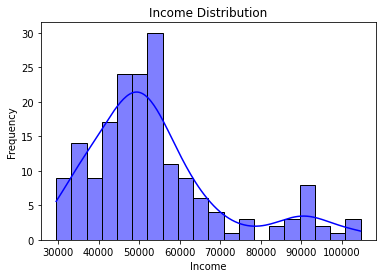

In [38]:
# 9. Income distribution analysis
sns.histplot(data['Income'], bins=20, kde=True, color='blue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

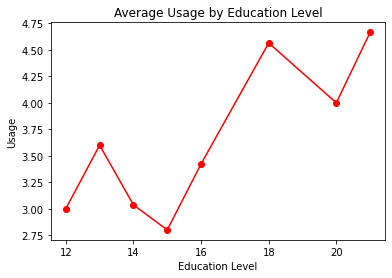

In [39]:
# 10. Impact of education on treadmill usage
education_usage = data.groupby('Education')['Usage'].mean()
education_usage.plot(kind='line', marker='o', color='red')
plt.title("Average Usage by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Usage")
plt.show()

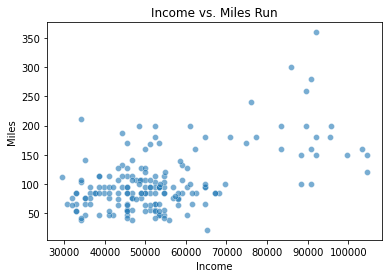

In [41]:
# 11. Relationship between Income and Miles run
sns.scatterplot(x=data['Income'], y=data['Miles'], alpha=0.6)
plt.title("Income vs. Miles Run")
plt.xlabel("Income")
plt.ylabel("Miles")
plt.show()

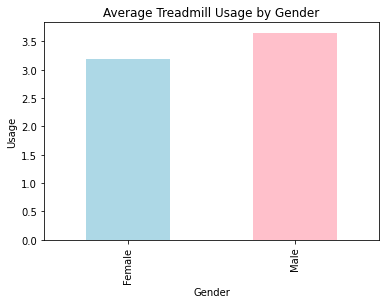

In [43]:
# 12. Gender-based usage analysis
gender_usage = data.groupby('Gender')['Usage'].mean()
gender_usage.plot(kind='bar', color=['lightblue', 'pink'])
plt.title("Average Treadmill Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Usage")
plt.show()

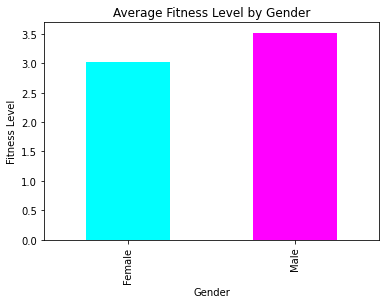

In [45]:
# 13. Fitness level comparison across genders
fitness_by_gender = data.groupby('Gender')['Fitness'].mean()
fitness_by_gender.plot(kind='bar', color=['cyan', 'magenta'])
plt.title("Average Fitness Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Fitness Level")
plt.show()

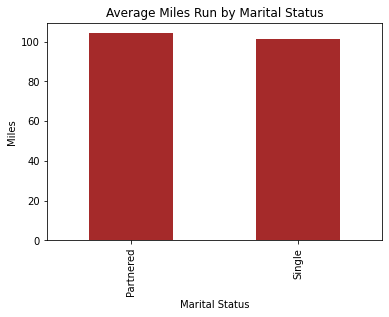

In [46]:
# 14. Miles run by marital status
miles_by_marital_status = data.groupby('MaritalStatus')['Miles'].mean()
miles_by_marital_status.plot(kind='bar', color='brown')
plt.title("Average Miles Run by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Miles")
plt.show()

In [49]:
# 15. Identifying high-frequency users
high_usage = data[data['Usage'] > data['Usage'].quantile(0.75)]
print("\n High-Frequency Users (Top 25% Usage):\n", high_usage)


 High-Frequency Users (Top 25% Usage):
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
8     KP281   21    Male         15        Single      5        4   35247   
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
100   KP481   25  Female         14     Partnered      5        3   47754   
123   KP481   33  Female         16     Partnered      5        3   53439   
144   KP781   23  Female         18        Single      5        4   53536   
148   KP781   24  Female         16        Single      5        5   52291   
149   KP781   24    Male         16        Single      5        5   49801   
152   KP781   25  Female         18     Partnered      5        5   61006   
154   KP781   25    Male         18     Partnered      6        4   70966   
155   KP781   25    Male         18     Partnered      6        5   75946   
158   KP781   26    Male         16

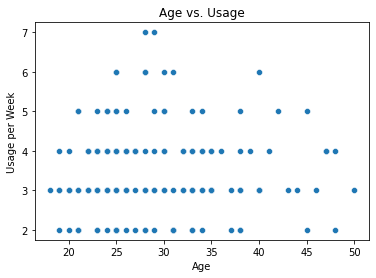

In [50]:
# 16. Relationship between Age and Usage
sns.scatterplot(x=data['Age'], y=data['Usage'])
plt.title("Age vs. Usage")
plt.xlabel("Age")
plt.ylabel("Usage per Week")
plt.show()

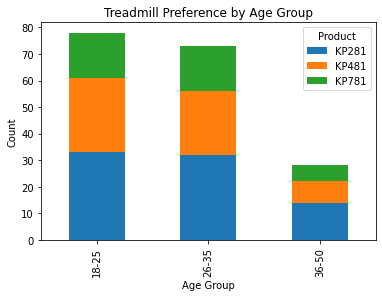

In [52]:
# 17. Treadmill preference by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 25, 35, 50], labels=["18-25", "26-35", "36-50"])
age_group_product = data.groupby('AgeGroup')['Product'].value_counts().unstack()
age_group_product.plot(kind='bar', stacked=True)
plt.title("Treadmill Preference by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

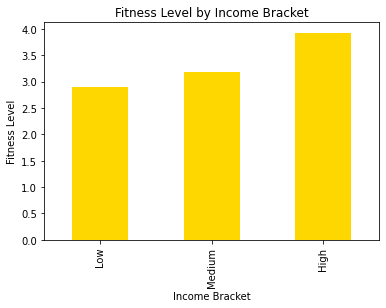

In [55]:
# 18. Fitness level based on income bracket
data['IncomeBracket'] = pd.qcut(data['Income'], q=3, labels=["Low", "Medium", "High"])
income_fitness = data.groupby('IncomeBracket')['Fitness'].mean()
income_fitness.plot(kind='bar', color='gold')
plt.title("Fitness Level by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Fitness Level")
plt.show()

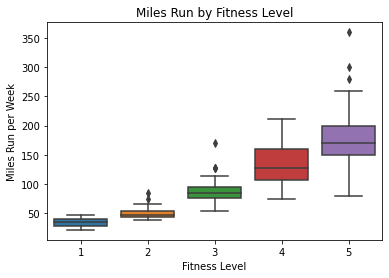

In [66]:
# 19. Box plot for miles run by fitness level
sns.boxplot(x=data['Fitness'], y=data['Miles'])
plt.title("Miles Run by Fitness Level")
plt.xlabel("Fitness Level")
plt.ylabel("Miles Run per Week")
plt.show()

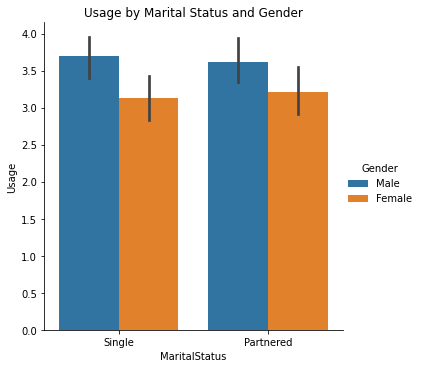

In [57]:
# 20. Usage trends by marital status and gender
sns.catplot(x='MaritalStatus', y='Usage', hue='Gender', kind='bar', data=data)
plt.title("Usage by Marital Status and Gender")
plt.show()

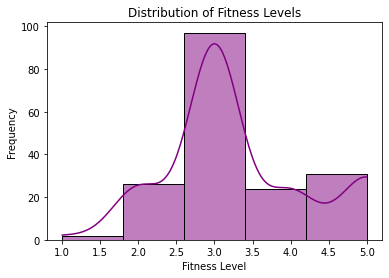

In [58]:
# 21. Distribution of fitness levels
sns.histplot(data['Fitness'], bins=5, kde=True, color='purple')
plt.title("Distribution of Fitness Levels")
plt.xlabel("Fitness Level")
plt.ylabel("Frequency")
plt.show()

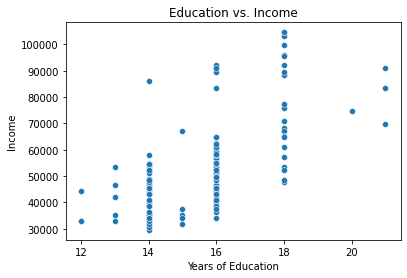

In [59]:
# 22. Scatter plot for education vs. income
sns.scatterplot(x=data['Education'], y=data['Income'])
plt.title("Education vs. Income")
plt.xlabel("Years of Education")
plt.ylabel("Income")
plt.show()

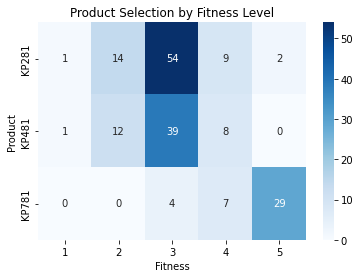

In [60]:
# 23. Heatmap of product selection by fitness level
product_fitness = pd.crosstab(data['Product'], data['Fitness'])
sns.heatmap(product_fitness, annot=True, cmap='Blues')
plt.title("Product Selection by Fitness Level")
plt.show()

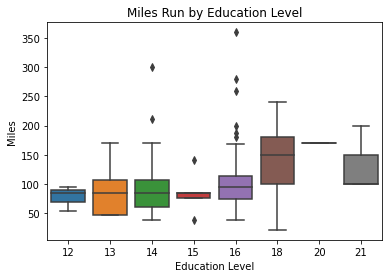

In [61]:
# 24. Relationship between miles run and education
sns.boxplot(x=data['Education'], y=data['Miles'])
plt.title("Miles Run by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Miles")
plt.show()

In [62]:
# 25. Identifying low-usage customers
low_usage = data[data['Usage'] < data['Usage'].quantile(0.25)]
print("\nLow-Frequency Users (Bottom 25% Usage):\n", low_usage)


Low-Frequency Users (Bottom 25% Usage):
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
1     KP281   19    Male         15        Single      2        3   31836   
9     KP281   21  Female         15     Partnered      2        3   37521   
16    KP281   23  Female         14        Single      2        3   34110   
19    KP281   23  Female         15     Partnered      2        2   34110   
24    KP281   24    Male         14        Single      2        3   45480   
28    KP281   25    Male         14     Partnered      2        3   45480   
29    KP281   25  Female         14     Partnered      2        2   53439   
32    KP281   25  Female         16     Partnered      2        2   40932   
36    KP281   26    Male         16     Partnered      2        2   53439   
43    KP281   27  Female         14     Partnered      2        3   45480   
44    KP281   28  Female         14     Partnered      2        3   46617   
45    KP281   28  Female         1